In [44]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset
file_path = '/kaggle/input/stock-price-prediction-by-hour/stock_data.stock_prices (1).csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


                        _id            timestamp symbol       close  \
0  675d97c919e05e490b32b39b  2023-01-03 09:30:00   AAPL  125.459999   
1  675d97c919e05e490b32b39c  2023-01-03 10:30:00   AAPL  125.345001   
2  675d97c919e05e490b32b39d  2023-01-03 11:30:00   AAPL  124.660004   
3  675d97c919e05e490b32b39e  2023-01-03 12:30:00   AAPL  124.649902   
4  675d97c919e05e490b32b39f  2023-01-03 13:30:00   AAPL  124.570000   

         high         low        open                           source  \
0  130.899994  125.230003  130.279999  Yahoo Finance Historical Hourly   
1  125.870003  124.730003  125.459999  Yahoo Finance Historical Hourly   
2  125.370003  124.349098  125.350197  Yahoo Finance Historical Hourly   
3  124.940002  124.190002  124.660004  Yahoo Finance Historical Hourly   
4  125.000000  124.190002  124.669899  Yahoo Finance Historical Hourly   

     volume  
0  27775505  
1  18104999  
2  11248777  
3   8860080  
4   8388062  


In [45]:
# Display the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (3018, 9)


In [46]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Display summary statistics
print("\nSummary statistics:\n", df.describe())


Missing values:
 _id          0
timestamp    0
symbol       0
close        0
high         0
low          0
open         0
source       0
volume       0
dtype: int64

Data types:
 _id           object
timestamp     object
symbol        object
close        float64
high         float64
low          float64
open         float64
source        object
volume         int64
dtype: object

Number of duplicate rows: 0

Summary statistics:
              close         high          low         open        volume
count  3018.000000  3018.000000  3018.000000  3018.000000  3.018000e+03
mean    182.649844   183.191214   182.054457   182.621955  7.007998e+06
std      22.492847    22.561620    22.410117    22.514798  4.697019e+06
min     124.570000   124.940002   124.169998   124.578003  0.000000e+00
25%     170.199005   170.820007   169.841396   170.220005  4.313826e+06
50%     181.217499   181.747498   180.714996   181.315002  5.591662e+06
75%     192.922501   193.268394   192.470001   192.937500  8.02

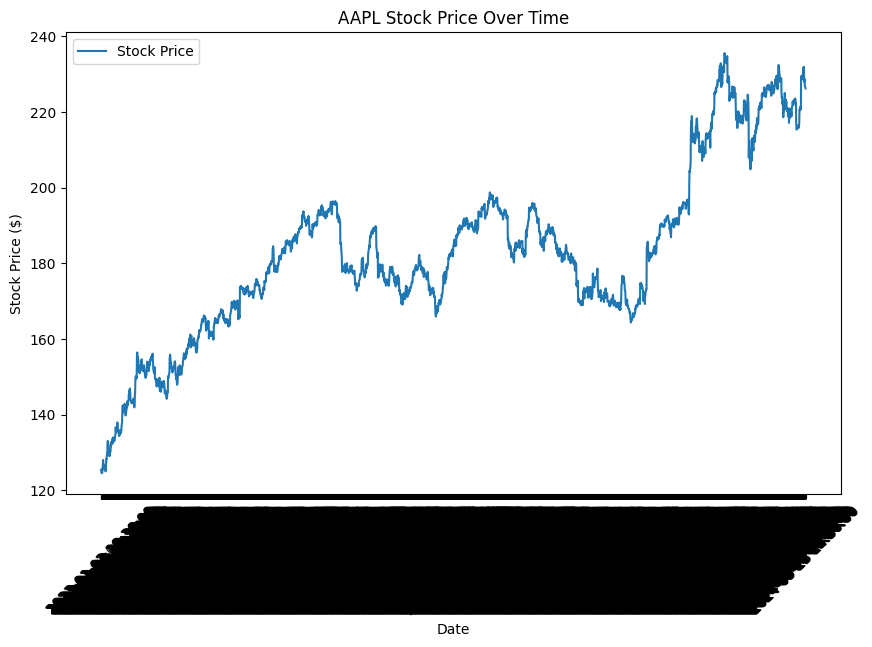

In [54]:
import matplotlib.pyplot as plt

# Plot the closing stock price
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['close'], label='Stock Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [48]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load your dataset (replace 'your_data.csv' with the actual filename)
# Ensure your dataset contains a 'Close' column for stock prices
data = pd.read_csv('/kaggle/input/stock-price-prediction-by-hour/stock_data.stock_prices (1).csv', index_col='timestamp', parse_dates=True)

In [50]:

# Split the data into training and testing sets (80% training, 20% testing)
split_ratio = 0.8
train_size = int(len(data) * split_ratio)
train, test = data[:train_size], data[train_size:]

# Scale the 'Close' column using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['close']])  # Only scale the 'Close' column

# Prepare the dataset for the LSTM model
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])  # Features (look_back values)
        y.append(data[i + look_back, 0])  # Target (the next value)
    return np.array(X), np.array(y)

# Define look-back window size
look_back = 60

# Create training dataset
X_train, y_train = create_dataset(train_scaled, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM input


In [51]:

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6486e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5693e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8095e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3230e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5554e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2695e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2468e-04
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4506e-04
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0603e-04
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6852e-04
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2229e-04
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6129e-04
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1315e-04
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9692e-04
Epoch 15/50
74/74 ━━━━━━━━━━━

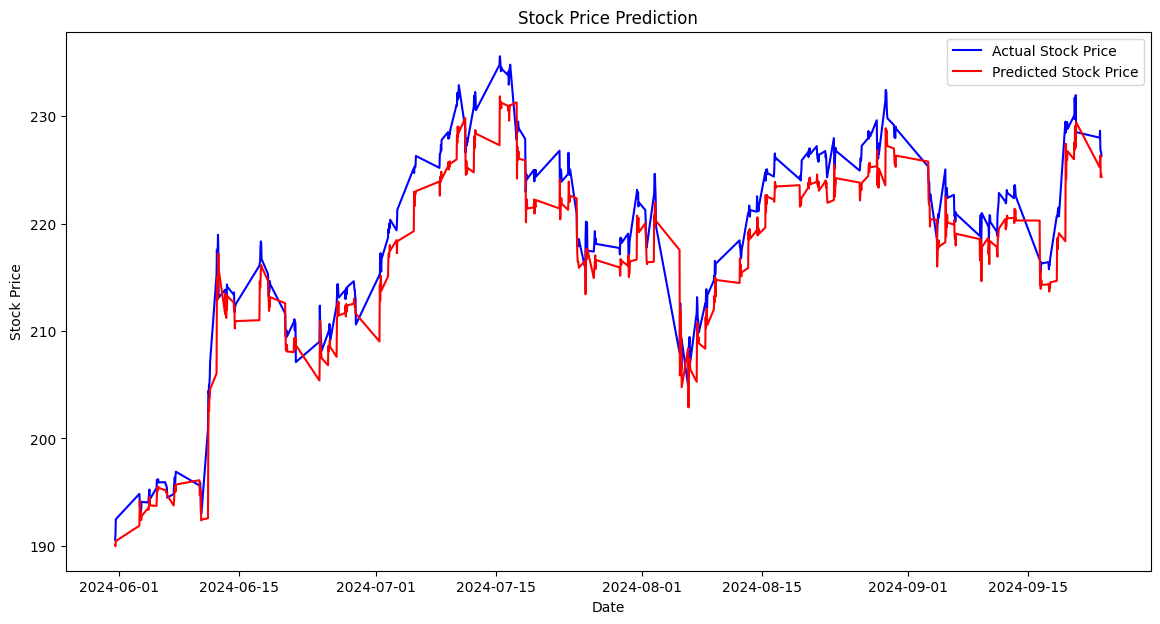

RMSE: 2.7300741381150164


In [58]:

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Prepare the test data
test_scaled = scaler.transform(test[['close']])  # Scale the test data
X_test, y_test = create_dataset(test_scaled, look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape for LSTM input

# Predict the stock prices
predicted_stock_price = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


Mean Squared Error (MSE): 7.453304799604449
Root Mean Squared Error (RMSE): 2.7300741381150164
Mean Absolute Error (MAE): 2.344371094423181
R-squared (R2): 0.9213056111647597


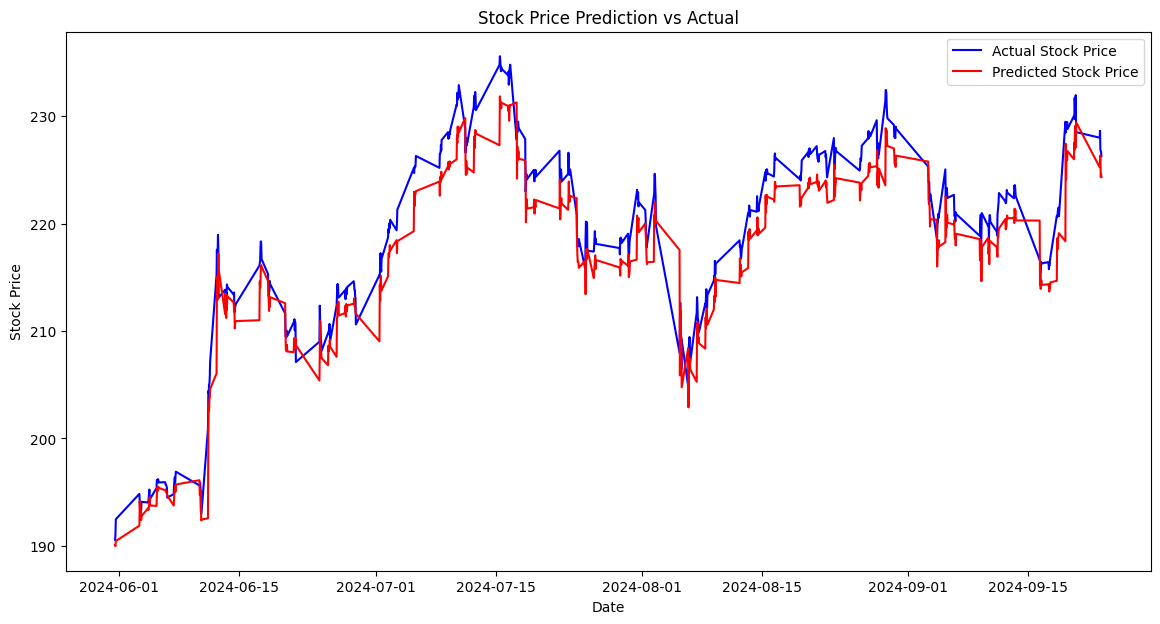

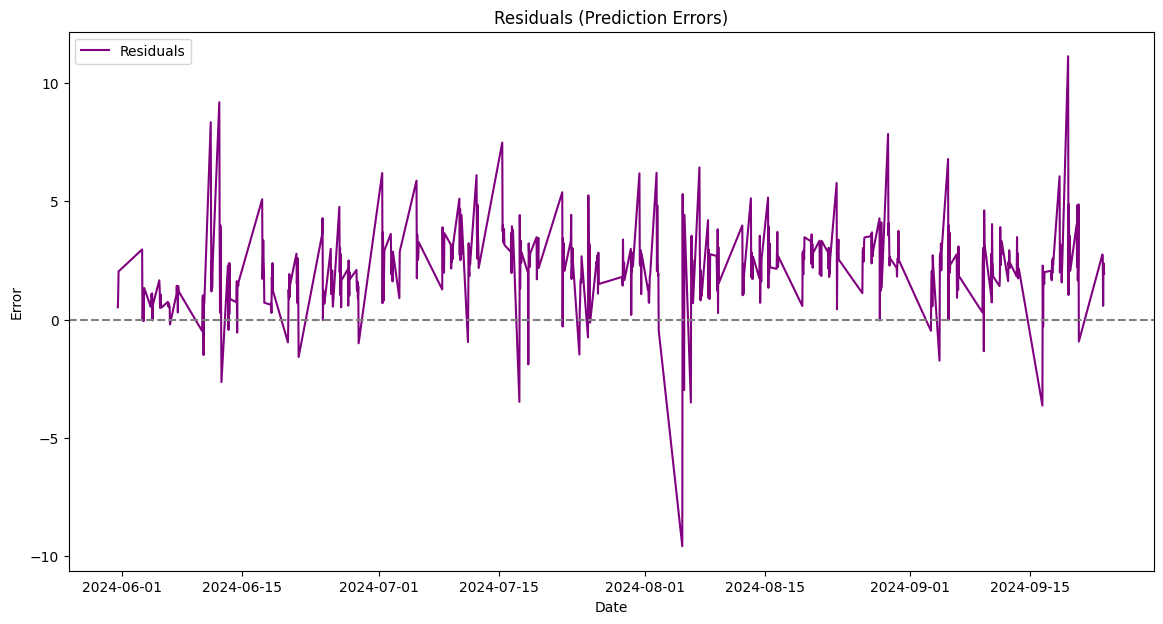

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(test['close'][look_back:], predicted_stock_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['close'][look_back:], predicted_stock_price)
r2 = r2_score(test['close'][look_back:], predicted_stock_price)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Visualize the predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(test.index[look_back:], test['close'][look_back:], color='blue', label='Actual Stock Price')
plt.plot(test.index[look_back:], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot residuals (errors)
residuals = test['close'][look_back:] - predicted_stock_price.flatten()
plt.figure(figsize=(14, 7))
plt.plot(test.index[look_back:], residuals, label='Residuals', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residuals (Prediction Errors)')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.show()
# Save the trained model
model.save('stock-price-prediction-lstm.h5')
# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')